# Macro-Molecular Model
<p align="center">
<img src="MMM.png" alt="Macro-Molecular Model" width="400"/>
</p>

## Equations

### Protein

$$\frac{dB_{pro}}{dt} = k_{pro}^{max} \cdot limit_{pro}\cdot B_{RNA}$$
$$limit_{pro} = min(\frac{CH}{CH+K^{sat}_{pro}}, \frac{NS}{NS+K^{sat}_{pro}\cdot R^{NC}_{pro}})$$

### DNA

$$\frac{dB_{DNA}}{dt} = k_{DNA}^{max} \cdot limit_{DNA}\cdot B_{pro}$$
$$limit_{DNA} = min(\frac{CH}{CH+K^{sat}_{DNA}}, \frac{NS}{NS+K^{sat}_{DNA}\cdot R^{NC}_{DNA}}, \frac{PS}{PS+K^{sat}_{DNA}\cdot R^{PC}_{DNA}})$$

### RNA

$$\frac{dB_{RNA}}{dt} = k_{RNA}^{max} \cdot limit_{RNA}\cdot B_{pro}$$
$$limit_{RNA} = min(\frac{CH}{CH+K^{sat}_{RNA}}, \frac{NS}{NS+K^{sat}_{RNA}\cdot R^{NC}_{RNA}}\frac{PS}{PS+K^{sat}_{RNA}\cdot R^{PC}_{RNA}})$$

## Parameters

|           | Micromonas sp. | Ostreococcus tauri | Thalassiosira weissflogii | Thalassiosira pseudonana |
| :-------: | :------------: | :----------------: | :-----------------------: | :----------------------: |
|  PRO:DNA  |     34.83      |       22.75        |           67.99           |          135.36          |
|  RNA:DNA  |      1.73      |        1.71        |           3.70            |           6.49           |
|  CHL:DNA  |      3.45      |        2.16        |           9.83            |          18.05           |
|  CH:DNA   |     23.32      |       19.01        |           79.26           |          121.48          |
|   k_pro   |    7.06e-05    |      1.50e-04      |         7.64e-05          |         1.17e-04         |
|   k_dna   |    1.62e-07    |      5.44e-07      |         1.16e-07          |         9.61e-08         |
|   k_rna   |    3.24e-07    |      6.71e-07      |         6.60e-07          |         6.60e-07         |
| k_pro_sat |    4.50e-13    |      4.82e-14      |         3.21e-11          |         2.73e-12         |
| k_dna_sat |    8.29e-16    |      2.07e-16      |         1.45e-12          |         6.01e-14         |
| k_rna_sat |    1.00e-12    |      2.40e-14      |         1.76e-10          |         1.74e-11         |

## Simple 0-Dimensional Example

Here we simulate phytoplankton cells as individuals in a well mixed reactor, like a lab experiment.

In [1]:
using PlanktonIndividuals

## Grid Setup
First we generate grid information (one grid box, 128m thick, and 128x128 in width) and the computational architecture (CPU).

In [2]:
arch = CPU()
grid = RectilinearGrid(size=(1, 1, 1), x=(0, 128meters), y=(0, 128meters), z=(0, -128meters))

RegularRectilinearGrid{Periodic, Periodic, Bounded}
domain: x ∈ [0.0, 128.0], y ∈ [0.0, 128.0], z ∈ [0.0, -128.0]
topology (Tx, Ty, Tz):     (Periodic, Periodic, Bounded)
resolution (Nx, Ny, Nz):   (1, 1, 1)
halo size (Hx, Hy, Hz):    (2, 2, 2)
grid spacing (Δx, Δy, Δz): 128.0, 128.0, [min=128.0, max=128.0])

## Parameters
The full list of parameters is accessible [here](https://github.com/JuliaOcean/PlanktonIndividuals.jl/blob/master/src/Parameters/param_default.jl)

In [3]:
phyt_parameter = Dict("Nsuper"   => [1],
                      "C_DNA"    => [1.8e-13], # DNA C quota of phyto cells (mmolC/cell)
                      "RNA2DNA"  => [1.73],    # Initial RNA:DNA ratio in phytoplankton (mmol C/mmolC) from Micromonas sp.
                      "PRO2DNA"  => [34.83],   # Initial protein:DNA ratio in phytoplankton (mmol C/mmolC) from Micromonas sp.
                      "CH2DNA"   => [23.3],    # Initial carbohydrate+lipid:DNA ratio in phytoplankton (mmol C/mmolC) from Micromonas sp.
                      "k_pro"    => [6.0e-5],  # Protein synthesis rate (mmol C/mmol C/second)
                      "k_sat_pro"=> [4.5e-13], # Hafl saturation constent for protein synthesis (mmol C/cell)
                      "k_dna"    => [1.6e-7],  # DNA synthesis rate (mmol C/mmol C/second)
                      "k_sat_dna"=> [1.0e-15], # Hafl saturation constent for DNA synthesis (mmol C/cell)
                      "k_rna"    => [3.0e-7],  # RNA synthesis rate (mmol C/mmol C/second)
                      "k_sat_rna"=> [1.0e-12], # Hafl saturation constent for RNA synthesis (mmol C/cell)
                      "R_NC_PRO" => [1/4.5],   # N:C ratio in protein (from Inomura et al 2020.)
                      "R_NC_DNA" => [1/2.9],   # N:C ratio in DNA (from Inomura et al 2020.)
                      "R_PC_DNA" => [1/11.1],  # P:C ratio in DNA
                      "R_NC_RNA" => [1/2.8],   # N:C ratio in RNA (from Inomura et al 2020.)
                      "R_PC_RNA" => [1/10.7],  # P:C ratio in RNA
                      "mort_P"   => [0.0],     # Probability of cell natural death per second
                      )
nothing

In [9]:
result_path = "./MMM_result/"
nsp = 1
ndays = 2
Nsuper = 1
diags_name = (:num, :graz, :mort, :dvid, 
              :PS, :VNO3, :VNH4, :VPO4, :S_PRO, :S_DNA, :S_RNA, :ρChl,
              :PRO, :DNA, :RNA, :CH, :NST, :PST, :Chl)
plank_name = (:sp1,)
tr_name = (:NH4, :NO3, :DON, :PON)

dt = collect(1:300:300*288*ndays)
nothing

In [5]:
model = PlanktonModel(arch, grid;
                      mode = MacroMolecularMode(),
                      N_species = nsp, 
					  N_individual = [2^7], 
					  max_individuals = 2^10,
                      phyt_params = update_phyt_params(phyt_parameter; N = nsp, mode = MacroMolecularMode()),
                      )

PlanktonModel:
├── grid: RegularRectilinearGrid{Periodic, Periodic, Bounded}(Nx=1, Ny=1, Nz=1)
├── MacroMolecularMode() is selected for phytoplankton physiology
├── individuals: 1 phytoplankton species with 128 individuals for each species
└── maximum number of individuals: 1024 per species

## Diagnostics

Model output for Eulerian tracers and processes of phytoplankton individuals

**Eulerian Tracers**
`:PAR, :DIC, :DOC, :POC, :NH4, :NO3, :DON, :PON, :PO4, :DOP, :POP`

**Individuals**

State Variables: `:num, :graz, :mort, :dvid,  :CH, :NST, :PST, :PRO, :DNA, :RNA, :Chl`

Processes: `:PS, :VDOC, :VNH4, :VNO3, :VPO4, :resp, :ρChl, :S_PRO, :S_DNA, :S_RNA, :exu`

In [6]:
diags = PlanktonDiagnostics(model; tracer = tr_name,
                                   plankton = diags_name,
                                   iteration_interval = 1)

PlanktonDiagnostics:
├── diagnostics of tracers: (:NH4, :NO3, :DON, :PON, :PAR, :T)
├── diagnostics of individuals: (:num, :graz, :mort, :dvid, :PS, :VNO3, :VNH4, :VPO4, :S_PRO, :S_DNA, :S_RNA, :ρChl, :PRO, :DNA, :RNA, :CH, :NST, :PST, :Chl)
└── save averaged diagnostics every 1 timesteps

## Simulation

Setup a simulation of the model for 2 days with a time-step of 5 min

In [10]:
sim = PlanktonSimulation(model, ΔT = 300.0seconds, 
								iterations = 288*ndays, 
								diags = diags)

sim.output_writer = PlanktonOutputWriter(dir = result_path,
                                         save_diags = true,
                                         max_filesize = 256MiB)

PlanktonOutputWriter:
├── files are saved at ./MMM_result/
├── diagnostics are saved as ./MMM_result/diags.jld2
├── individuals are not saved
├── write log: false
└── Maximum file size: 256.0 MiB

## Run the simulation

In [11]:
update!(sim)

## Plot the results

In [12]:
using JLD2, Statistics
using CairoMakie

In [13]:
function read_output(diags::Tuple, filepath::String, plank_name::Tuple, tr_name::Tuple, nz::Int64)
    plank_data = []
    tr_data = []
    for sp in plank_name
        procs = []
        for diag in diags
            file = jldopen(joinpath(filepath,"diags.jld2"))
            iterations = parse.(Int, keys(file["timeseries/t"]))
            d = zeros(nz,length(iterations))
            for (i, iter) in enumerate(iterations)
                d[:,i] = mean(mean(file["timeseries/$sp/$diag/$iter"], dims = 1)[1,:,:], dims = 1)[1,:]
            end
                close(file)
            push!(procs,d)
        end
        procs_tuple = NamedTuple{diags}(procs)
        push!(plank_data, procs_tuple)
    end
    plank_dt = NamedTuple{plank_name}(plank_data)
    
    for tr in tr_name
        file = jldopen(joinpath(filepath,"diags.jld2"))
        iterations = parse.(Int, keys(file["timeseries/t"]))
        d = zeros(nz,length(iterations))
        for (i, iter) in enumerate(iterations)
            d[:,i] = mean(mean(file["timeseries/$tr/$iter"], dims = 1)[1,:,:], dims = 1)[1,:]
        end
        close(file)
        push!(tr_data,d)
    end
    tr_dt = NamedTuple{tr_name}(tr_data)
    return plank_dt, tr_dt
end

function proc_output(diags, nsp, dT, Nsuper) 
    dat = []
    for i in 1:nsp
        dvid = diags[i].dvid[1,:] .* Nsuper ./ dT
        S_DNA = diags[i].S_DNA[1,:] ./ diags[i].num[1,:] .*1e12 ./ Nsuper  # fmolC/cell/s
        S_RNA = diags[i].S_RNA[1,:] ./ diags[i].num[1,:] .*1e12 ./ Nsuper  # fmolC/cell/s
        S_PRO = diags[i].S_PRO[1,:] ./ diags[i].num[1,:] .*1e12 ./ Nsuper  # fmolC/cell/s
        DNA = diags[i].DNA[1,:] ./ diags[i].num[1,:] .*1e12 ./ Nsuper  # fmolC/cell
        RNA = diags[i].RNA[1,:] ./ diags[i].num[1,:] .*1e12 ./ Nsuper  # fmolC/cell
        PRO = diags[i].PRO[1,:] ./ diags[i].num[1,:] .*1e12 ./ Nsuper  # fmolC/cell
        CH = diags[i].CH[1,:] ./ diags[i].num[1,:] .*1e12 ./ Nsuper    # fmolC/cell
        NST = diags[i].NST[1,:] ./ diags[i].num[1,:] .*1e12 ./ Nsuper  # fmolN/cell
        PST = diags[i].PST[1,:] ./ diags[i].num[1,:] .*1e12 ./ Nsuper  # fmolP/cell
        Chl = diags[i].Chl[1,:] ./ diags[i].num[1,:] .*1e12 ./ Nsuper ./ 893.49 .* 55.0 # fmolC/cell
        tot_C = DNA .+ RNA .+ PRO .+ CH .+ Chl
        tot_N = PRO ./ 4.5 + DNA ./ 2.9 + RNA ./ 2.8 + NST + Chl / 893.49 * 4.0
        tot_P = DNA ./ 11.1 + RNA ./ 10.7 + PST
        sp = (dvid = dvid, S_DNA = S_DNA, S_RNA = S_RNA, S_PRO = S_PRO,
                DNA = DNA, RNA = RNA, PRO = PRO, CH = CH, Chl = Chl, 
                tot_C = tot_C, tot_N = tot_N, tot_P = tot_P)
        push!(dat,sp)
    end
    return dat
end

proc_output (generic function with 1 method)

In [14]:
function plot_diags(diags, nsp, ndays)
    xticks = collect(0:86400*1:86400*ndays)
    xtick_labels = string.(collect(0:1:ndays))
    xtick = (xticks, xtick_labels)
    
    f = Figure(size = (1000, 1000))
    ax1 = Axis(f[1,1], title = "Division (per min)", xticks = xtick)
    ax2 = Axis(f[2,1], title = "DNA Synthesis (fgC/cell/s)", xticks = xtick)
    ax3 = Axis(f[3,1], title = "RNA Synthesis (fgC/cell/s)", xticks = xtick)
    ax4 = Axis(f[4,1], title = "Protein Synthesis (fgC/cell/s)", xticks = xtick)
    ax5 = Axis(f[5,1], title = "Photosynthesis (fgC/cell/s)", xticks = xtick)
    ax11 =Axis(f[6,1], title = "N storage (fgN/cell)", xticks = xtick)
    ax6 = Axis(f[1,2], title = "Population (cells)", xticks = xtick)
    ax7 = Axis(f[2,2], title = "DNA (fgC/cell)", xticks = xtick)
    ax8 = Axis(f[3,2], title = "RNA (fgC/cell)", xticks = xtick)
    ax9 = Axis(f[4,2], title = "Protein (fgC/cell)", xticks = xtick)
    ax10 = Axis(f[5,2], title = "CH (fgC/cell)", xticks = xtick)
    ax12 = Axis(f[6,2], title = "Chl (fgC/cell)", xticks = xtick)

    for i in 1:nsp
        lines!(ax1, dt,diags[i].dvid[1,:] ./ diags[i].num[1,:] ./ 300, color = cgrad(:thermal, rev = false)[i*12], label = "sp"*lpad(i,2,"0"))
        lines!(ax2, dt,diags[i].S_DNA[1,:] ./ diags[i].num[1,:] .*12e12 ./ Nsuper, color = cgrad(:thermal, rev = false)[i*12], label = "sp"*lpad(i,2,"0"))
        lines!(ax3, dt,diags[i].S_RNA[1,:] ./ diags[i].num[1,:] .*12e12 ./ Nsuper, color = cgrad(:thermal, rev = false)[i*12], label = "sp"*lpad(i,2,"0"))
        lines!(ax4, dt,diags[i].S_PRO[1,:] ./ diags[i].num[1,:] .*12e12 ./ Nsuper, color = cgrad(:thermal, rev = false)[i*12], label = "sp"*lpad(i,2,"0"))
        lines!(ax5, dt,diags[i].PS[1,:] ./ diags[i].num[1,:] .*12e12 ./ Nsuper, color = cgrad(:thermal, rev = false)[i*12], label = "sp"*lpad(i,2,"0"))
        lines!(ax6, dt,diags[i].num[1,:] .* Nsuper, color = cgrad(:thermal, rev = false)[i*12], label = "sp"*lpad(i,2,"0"))
        lines!(ax7, dt,diags[i].DNA[1,:] ./ diags[i].num[1,:] .*12e12 ./ Nsuper, color = cgrad(:thermal, rev = false)[i*12], label = "sp"*lpad(i,2,"0"))
        lines!(ax8, dt,diags[i].RNA[1,:] ./ diags[i].num[1,:] .*12e12 ./ Nsuper, color = cgrad(:thermal, rev = false)[i*12], label = "sp"*lpad(i,2,"0"))
        lines!(ax9, dt,diags[i].PRO[1,:] ./ diags[i].num[1,:] .*12e12 ./ Nsuper, color = cgrad(:thermal, rev = false)[i*12], label = "sp"*lpad(i,2,"0"))
        lines!(ax10, dt,diags[i].CH[1,:] ./ diags[i].num[1,:] .*12e12 ./ Nsuper, color = cgrad(:thermal, rev = false)[i*12], label = "sp"*lpad(i,2,"0"))
        lines!(ax11, dt,diags[i].NST[1,:] ./ diags[i].num[1,:] .*14e12 ./ Nsuper, color = cgrad(:thermal, rev = false)[i*12], label = "sp"*lpad(i,2,"0"))
        lines!(ax12, dt,diags[i].Chl[1,:] ./ diags[i].num[1,:] .*12e12 ./ Nsuper ./ 893.49 .* 55.0, color = cgrad(:thermal, rev = false)[i*12], label = "sp"*lpad(i,2,"0"))
    end
    
    #save("exp_proc.png", f)
    
    return f
end

plot_diags (generic function with 1 method)

In [15]:
diags, tr_dt = read_output(diags_name, result_path, plank_name, tr_name, 1)
nothing

In [16]:
out = proc_output(diags, 1, 300, Nsuper)[1]
nothing

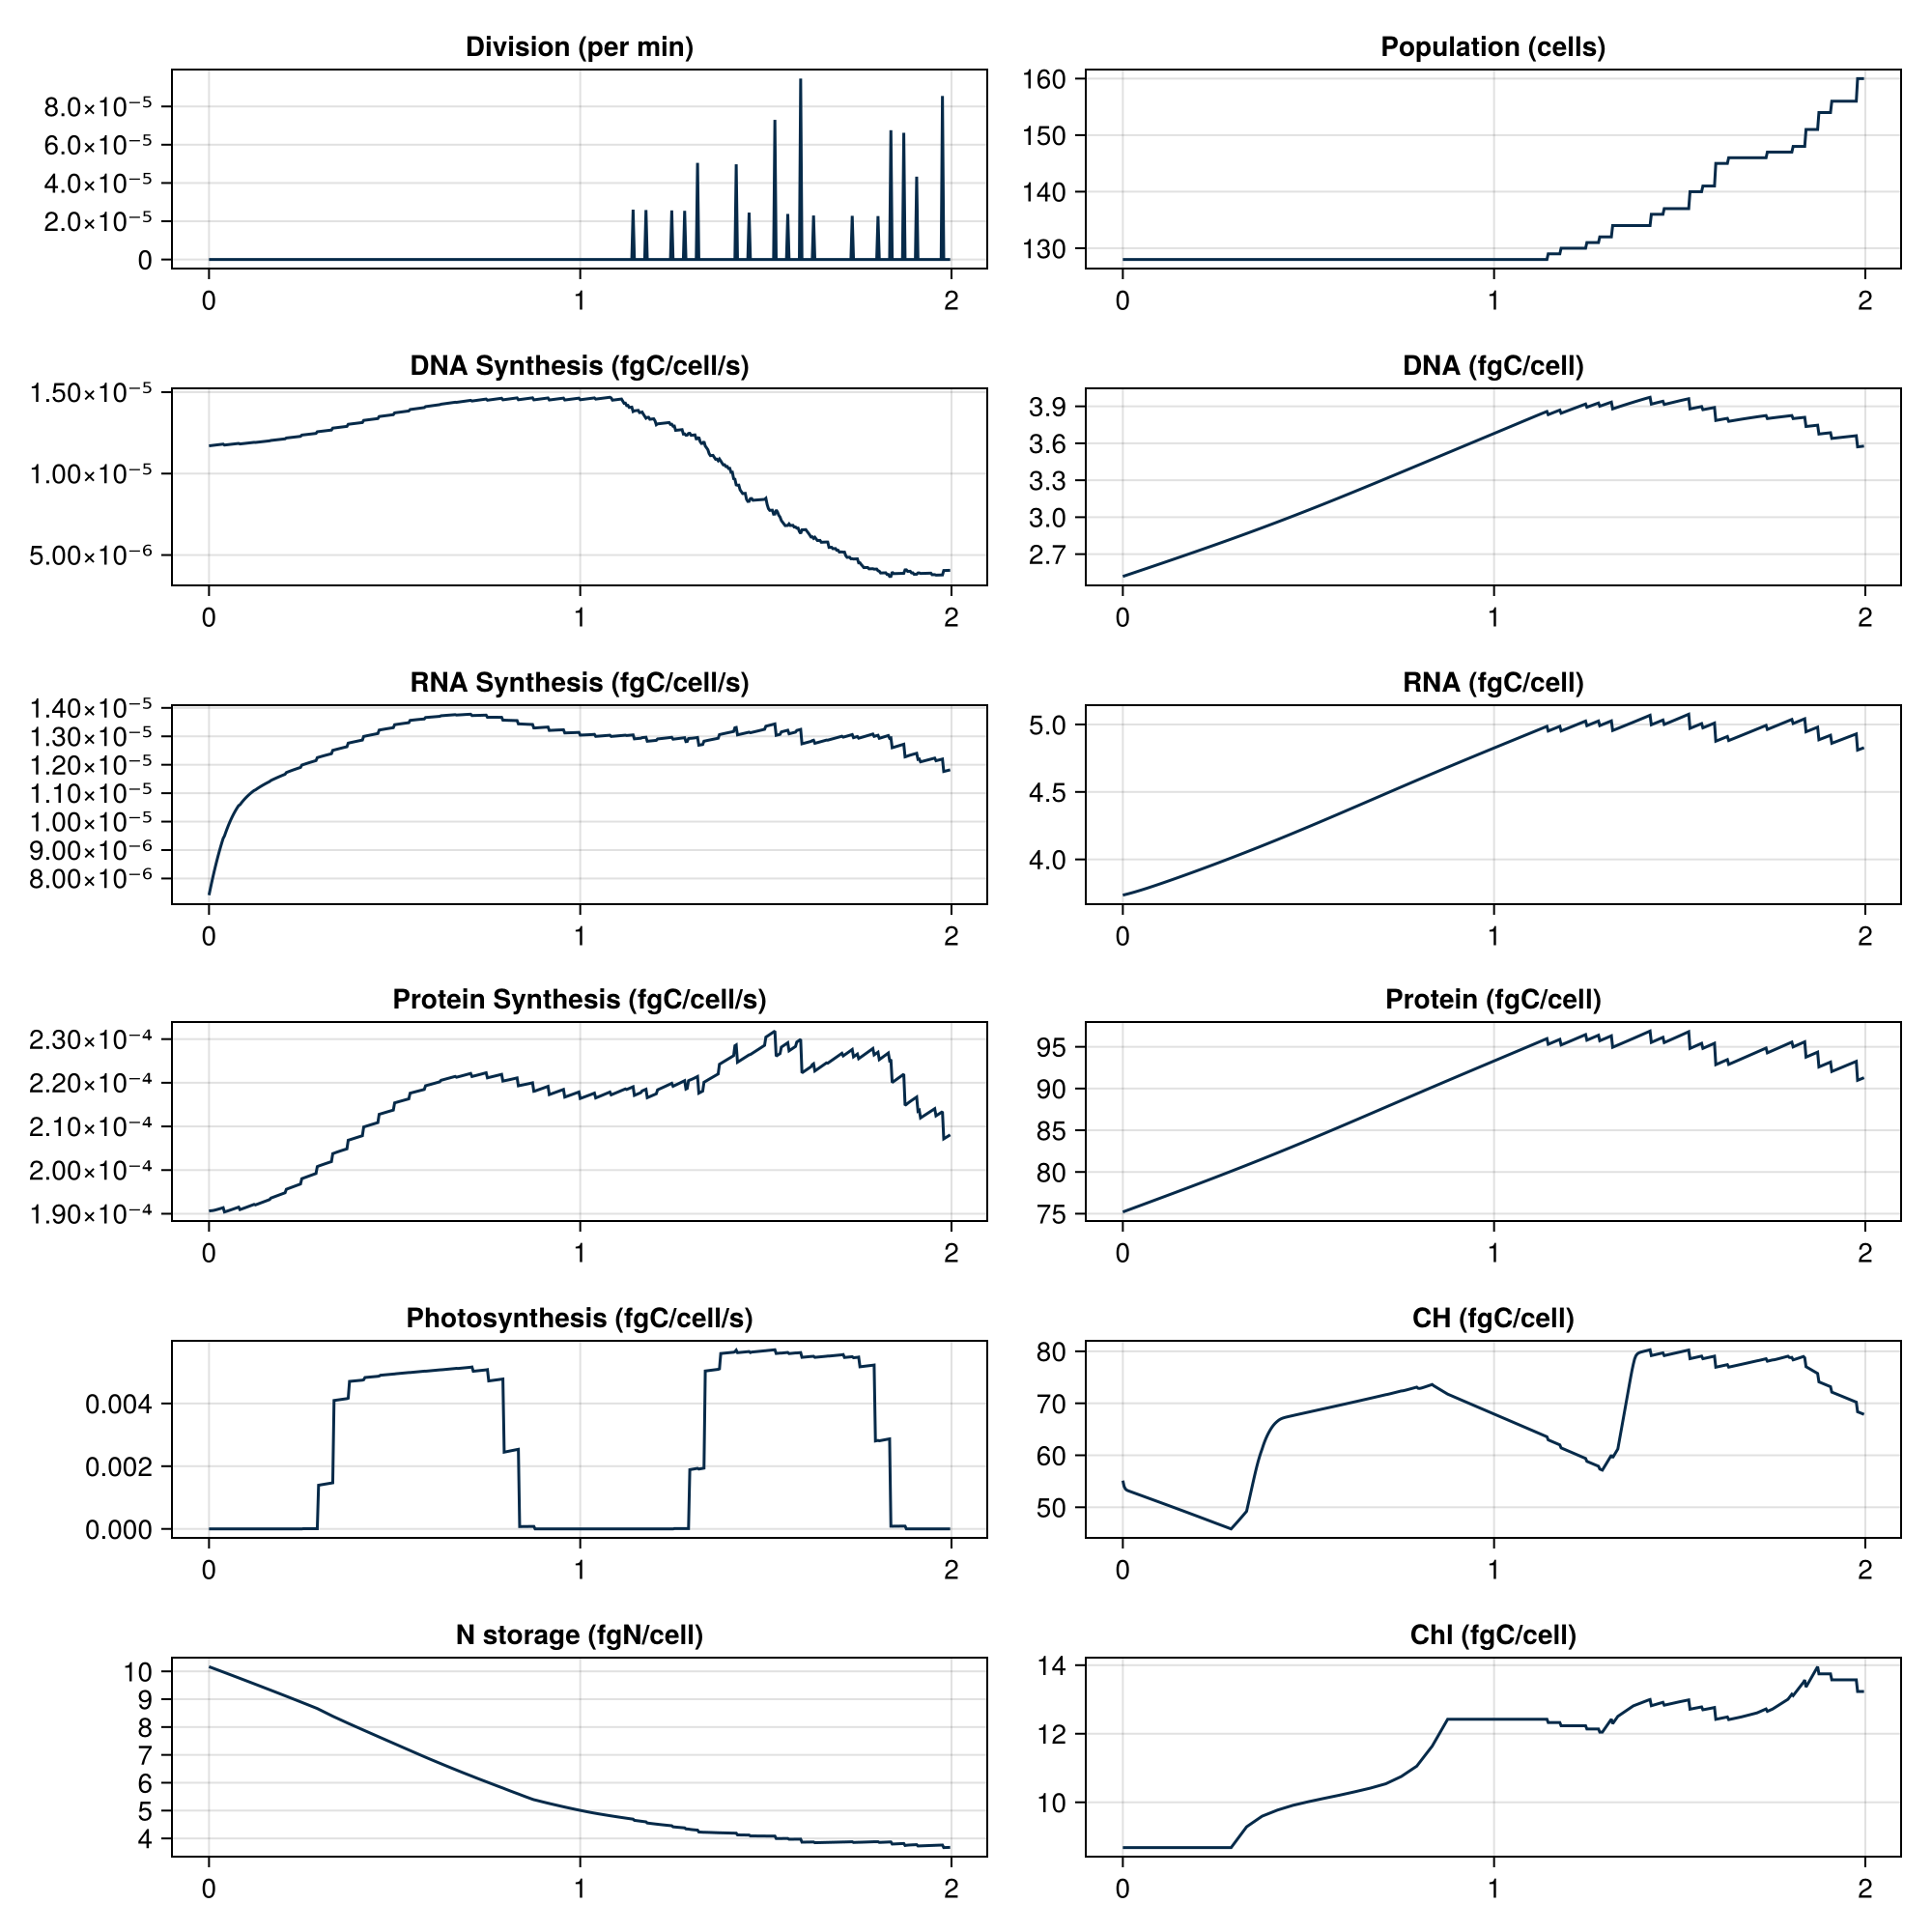

In [17]:
plot_diags(diags,1,ndays)